### Aritificial Neural Network
1. 생물학적 신경망에서 영감을 얻어 만들어짐 
2. 여러 입력이 들어오면 각각 가중치를 곱해 더해주고 추가적으로 편차도 더해주며 이렇게 나온 값에 활성화 함수를 통해 변형하여 전달하는 것 
3. 인공신경망은 여러 개의 입력값과 출력값을 가질 수 있음 
4. 은닉층의 수에 따라 신경망과 심층 신경망으로 나누어짐 

### Propagation 
1. 전파(Propagation) : 입력값이 들어오면 여러 개의 은닉층을 순서대로 거쳐 결과값을 도출하는 과정 
2. 역전파(Back Propagation) : Output과 Label의 차이로 계산된 손실을 연쇄법칙을 이용하여 다시 Input까지 전달하는 과정 

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init 

In [2]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
# 평균은 0 표준편차가 1인 값이 [num_data, 1] 형태로 들어감 

x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
# -15 ~ 15까지의 값이 랜덤하게 [num_data,1] 형태로 들어감 

y = (x**2) + 3
y_noise = y + noise

In [5]:
model = nn.Sequential(
        nn.Linear(1,6), # input_dim이 1이고 output_dim이 6으로 나옴 
        nn.ReLU(),
        nn.Linear(6,10),
        nn.ReLU(),
        nn.Linear(10,6),
        nn.ReLU(),
        nn.Linear(6,1))

loss_func = nn.L1Loss() # loss Function은 L1을 사용 
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

loss_array = []

for i in range(num_epoch):
    optimizer.zero_grad()
    # 매 epoch마다 기울기를 초기화 
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    # w와 b를 계산 
    optimizer.step()
    # model.parameters에 리턴되는 변수의 기울기에 학습률을 곱한 것을 빼주는 함수 
    loss_array.append(loss)
    # loss값을 loss_array에 저장 

In [7]:
print(loss_array)

[tensor(77.0325, grad_fn=<L1LossBackward>), tensor(77.0316, grad_fn=<L1LossBackward>), tensor(77.0307, grad_fn=<L1LossBackward>), tensor(77.0298, grad_fn=<L1LossBackward>), tensor(77.0289, grad_fn=<L1LossBackward>), tensor(77.0280, grad_fn=<L1LossBackward>), tensor(77.0271, grad_fn=<L1LossBackward>), tensor(77.0262, grad_fn=<L1LossBackward>), tensor(77.0253, grad_fn=<L1LossBackward>), tensor(77.0244, grad_fn=<L1LossBackward>), tensor(77.0235, grad_fn=<L1LossBackward>), tensor(77.0226, grad_fn=<L1LossBackward>), tensor(77.0217, grad_fn=<L1LossBackward>), tensor(77.0208, grad_fn=<L1LossBackward>), tensor(77.0198, grad_fn=<L1LossBackward>), tensor(77.0189, grad_fn=<L1LossBackward>), tensor(77.0180, grad_fn=<L1LossBackward>), tensor(77.0171, grad_fn=<L1LossBackward>), tensor(77.0162, grad_fn=<L1LossBackward>), tensor(77.0153, grad_fn=<L1LossBackward>), tensor(77.0144, grad_fn=<L1LossBackward>), tensor(77.0135, grad_fn=<L1LossBackward>), tensor(77.0126, grad_fn=<L1LossBackward>), tensor(77.

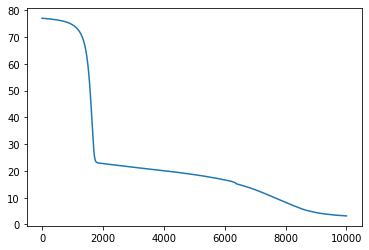

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_array)
plt.show()
# 점점 Loss가 0으로 가는 것을 확인 할 수 있음 